In [2]:
import numpy as np
c0 = np.zeros(100)
mean0 = [3, 1]
cov0 = [[1, 0], [0, 1]]  # diagonal covariance
c1 = np.ones(100)
mean1 = [2,4]
cov1 = np.array([[1,0],[0,1]])

In [ ]:
import matplotlib.pyplot as plt
x0, y0 = np.random.multivariate_normal(mean0, cov0, 100).T
plt.plot(x0, y0, 'bx')
plt.show()

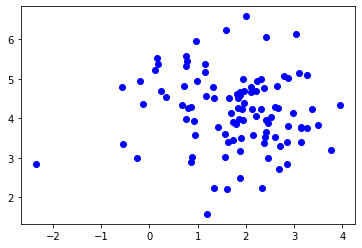

In [40]:
x1, y1 = np.random.multivariate_normal(mean1, cov1, 100).T
plt.plot(x1, y1, 'bo')
plt.show()
# print(type(x0))
# x0,y0

In [41]:
#feature 1 are all clubbed into one single row.
X1 = np.r_[x0,x1]

#feature 2 are all clubbed into another single row
X2 = np.r_[y0,y1]
m = len(X1)
m

200

In [49]:
X = np.c_[(np.ones(m)), X1,X2]
# X = np.c_[X1,X2]
# X

(1, 200)
(200, 3)


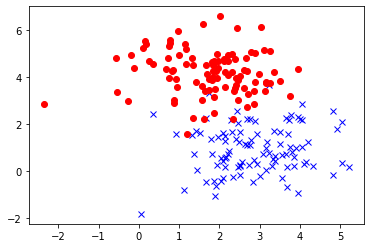

In [50]:
Y = np.asarray([np.r_[c0,c1]])
print(Y.shape)
print(X.shape)
plt.plot(x0, y0, 'bx')
plt.plot(x1, y1, 'or')
plt.show()
# X

#### Sigmoid funtion

In [51]:
def sig(X,theta):
    z = np.dot(X,theta.T)
    return 1/(1+np.exp(-z))

# sig(np.array([0,1]), np.array([0,0]))

#### Cost function
$ y^i*log(1/(1+e^{\theta X^i}) + (1-y^i)*log(1/(1+e^{\theta X^i})$

In [53]:
#iterates through whole loop
def loglikelihood(theta,X,y):
    m = len(X)
    z = sig(X,theta)
    z = np.sum(y*np.log(z) + (1-y)*np.log(1-z))
    return z
loglikelihood(np.array([[0,0,0]]) , X,Y)

-27725.88722239781

#### Gradient of Cost function


In [22]:
def gradientOfLikelihood(theta, X,y):
    z = sig(X,theta)
    return np.sum(y*X/z + (1-y)*X/(1-z)) 


In [23]:
def cost_mse_gradFunction(theta, X, y):
    
    m=len(y)
    
    predictions = sig(X,theta)
    error = (-y * np.log(predictions)) - ((1-y)*np.log(1-predictions))

    cost = 1/m * sum(error)
    mse = 1/m * sum(error**2)
    grad = 1/m * np.dot(X.transpose(),(y - predictions))
    
    return cost[0] , grad, mse


In [24]:
def gradientAscent(X,y,theta,alpha,num_iters):
      
    m=len(y)
    J_history =[]
    mse_history = []
    for i in range(num_iters):
        cost, grad, mse = cost_mse_gradFunction(theta,X,y)
        theta = theta + (alpha * grad.T)
        J_history.append(cost)
        mse_history.append(mse)
    return theta , J_history, mse_history

### Initial Cost

In [34]:
# theta = np.array([[0,0,0]])
# # likelihood(theta,X,Y)
# theta , J_history, mse_history = gradientAscent(X,Y,theta,.05,3000)
# # print(theta)
# J_history[-1]

/home/prithvi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  
/home/prithvi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in multiply
  


2.069593577216963e-06

#### Since no closed true solution, we will use Gradient Descent(Ascent in this case)

In [56]:
learning_rate = 0.001
iterations = []
i=0
theta = np.array([[0,0,0]])
errors = []


while True:
    
    errors.append(loglikelihood(theta,X,Y))
    oldT = theta
    a = (learning_rate * gradientOfLikelihood(theta, X,Y.T))
    print(a)
    theta = oldT + a
    print("Cost of interation i: %f" % loglikelihood(theta,X,Y))
#     print("Theta ", end = '') 
#     print(theta)
#     errors.append(likelihood(theta,X,Y))
    i=i+1
    iterations.append(i)
    check_convergence = loglikelihood(theta,X,Y) - loglikelihood(oldT,X,Y) 
    if abs(check_convergence) < 0.0001:
        break
#     print("Error difference %f ", check_convergence )

print("Optimal theta: ", end= ' ' )
print(theta)
print("Number of iterations: %f" % i)

2.3542128980478783
Cost of interation i: -277527.912622
8573904.870750288
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan


/home/prithvi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
/home/prithvi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in multiply
  """
/home/prithvi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.
/home/prithvi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of in

Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of in

Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of in

nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost o

nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost o

nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost o

Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of in

Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of in

Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of in

Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of in

Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of in

nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost o

Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of in

nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost o

nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost o

Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of in

Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of in

nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost o

Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of in

nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost o

Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of in

nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost o

Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of in

nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost o

Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of in

nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost o

Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of in

nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost o

Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of in

Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of in

nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost o

nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost o

nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost o

Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of in

nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost o

Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of in

nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost o

nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost o

Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of in

nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost o

nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost o

nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost o

nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost o

nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost o

nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost o

Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of in

Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of in

nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost o

nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost o

Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of in

Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of in

nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost o

nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost o

Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of in

nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost o

Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of in

nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost o

nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost o

nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost o

nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost o

nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost o

nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost o

nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost of interation i: nan
nan
Cost o

KeyboardInterrupt: 

In [ ]:
plt.plot(errors, iterations)
plt.show